In [1]:
import pandas as pd

dataset = pd.read_csv('SyntheticFrenchPopulation.csv')

dataset.corr()

<ipython-input-1-1ddb9d5b571a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Unnamed: 0,Age,Minor Pathology,Psychiatric Disorder,Diabetes,Cardiovascular Disease,Renal Disease,Pregnant,Risk Score
Unnamed: 0,1.000000,0.004579,-0.000652,0.004334,0.004256,0.002325,0.005357,0.005933,0.005591
Age,0.004579,1.000000,-0.007640,0.034249,0.043504,0.629351,0.358691,-0.084967,0.686285
Minor Pathology,-0.000652,-0.007640,1.000000,-0.007206,-0.003965,-0.005279,-0.000892,0.005952,0.085043
Psychiatric Disorder,0.004334,0.034249,-0.007206,1.000000,-0.006531,0.021346,0.002389,0.004607,0.031177
Diabetes,0.004256,0.043504,-0.003965,-0.006531,1.000000,0.073286,0.130016,-0.003134,0.229552
Cardiovascular Disease,0.002325,0.629351,-0.005279,0.021346,0.073286,1.000000,0.238112,-0.105681,0.638568
Renal Disease,0.005357,0.358691,-0.000892,0.002389,0.130016,0.238112,1.000000,-0.034041,0.676353
Pregnant,0.005933,-0.084967,0.005952,0.004607,-0.003134,-0.105681,-0.034041,1.000000,0.046006
Risk Score,0.005591,0.686285,0.085043,0.031177,0.229552,0.638568,0.676353,0.046006,1.000000


# Classification Method
* Using Quartiles to define risk level

Low Risk range: 0-0.19
At Risk range: 0.19-0.37
High Risk range: 0.37-0.58
Very High Risk range: 0.58-1.0


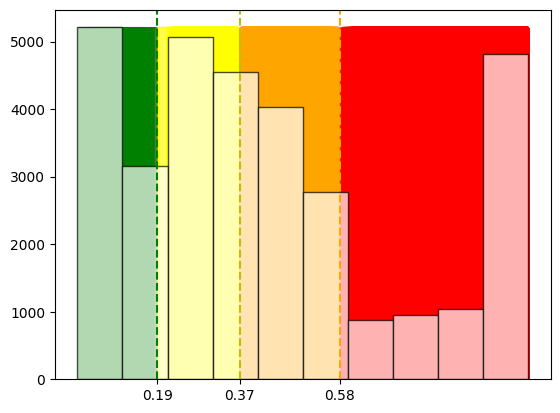

In [2]:
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np

x = dataset['Risk Score']

q1 = np.percentile(x, 25)
q2 = np.percentile(x, 50)  # This is also the median
q3 = np.percentile(x, 75)

plt.fill_between(x, 0, 5210, where=(x < q1), color='green', alpha=0.005, label='Low Risk')
plt.fill_between(x, 0, 5210, where=((x > q1) & (x < q2)), color='yellow', alpha=0.01, label='At Risk')
plt.fill_between(x, 0, 5210, where=((x > q2) & (x < q3)), color='orange', alpha=0.01, label='High Risk')
plt.fill_between(x, 0, 5210, where=(x > q3), color='red', alpha=0.01, label='Very High Risk')

plt.hist(x, bins=10, label='Histogram', color='white', edgecolor='k', alpha=0.7)
plt.xticks([q1, q2, q3], [round(q1, 2), round(q2, 2), round(q3, 2)])


plt.axvline(q1, color='g', linestyle='--', label='Q1 (25th percentile)')
plt.axvline(q2, color='y', linestyle='--', label='Q2 (50th percentile, median)')
plt.axvline(q3, color='orange', linestyle='--', label='Q3 (75th percentile)')


print(f"Low Risk range: 0-{round(q1, 2)}")
print(f"At Risk range: {round(q1, 2)}-{round(q2, 2)}")
print(f"High Risk range: {round(q2, 2)}-{round(q3, 2)}")
print(f"Very High Risk range: {round(q3, 2)}-1.0")

In [3]:
dataset['Risk'] = dataset['Risk Score'].apply(lambda x: 'Low Risk' if x <= 0.19 else
                                                        'Moderate Risk' if 0.19 < x <= 0.37 else
                                                        'High Risk' if 0.37 < x <= 0.58 else
                                                        'Very High Risk')

# Classification Decision Tree

* Classification Report
* Confusion Matrix
* Observations & Insights
* Tree Structure
* Feature Importance

In [4]:
dataset['Gender'] = dataset['Gender'].apply(lambda x: 0 if x=='Female' else 1)
dataset = dataset.drop('Age Group', axis=1)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = dataset.drop(['Risk Score', 'Risk'], axis=1)
X = X.drop('Unnamed: 0', axis=1)
y = dataset['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42, max_depth=11, min_samples_split=27, criterion='entropy')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.92
Classification Report:
                precision    recall  f1-score   support

     High Risk       0.81      0.88      0.84      1553
      Low Risk       0.97      1.00      0.99      1629
 Moderate Risk       0.90      0.89      0.89      1660
Very High Risk       0.99      0.90      0.94      1658

      accuracy                           0.92      6500
     macro avg       0.92      0.92      0.92      6500
  weighted avg       0.92      0.92      0.92      6500



In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_true = list(y_test)
# Calculate overall accuracy
overall_accuracy = accuracy_score(y_true, y_pred)
print(f"Overall Accuracy: {overall_accuracy:.2f}")

# Calculate accuracy for each class
unique_classes = set(y_true)  # Assuming y_true contains all unique class labels
class_accuracies = {}

for class_label in unique_classes:
    class_indices = [i for i, label in enumerate(y_true) if label == class_label]
    class_true = [y_true[i] for i in class_indices]
    class_pred = [y_pred[i] for i in class_indices]
    class_accuracy = accuracy_score(class_true, class_pred)
    class_accuracies[class_label] = class_accuracy

# Print class-wise accuracies
print("Class-wise Accuracies:")
for class_label, class_accuracy in class_accuracies.items():
    print(f"Class {class_label}: {class_accuracy:.2f}")


Overall Accuracy: 0.92
Class-wise Accuracies:
Class Low Risk: 1.00
Class Very High Risk: 0.90
Class High Risk: 0.88
Class Moderate Risk: 0.89


## Confusion Matrix

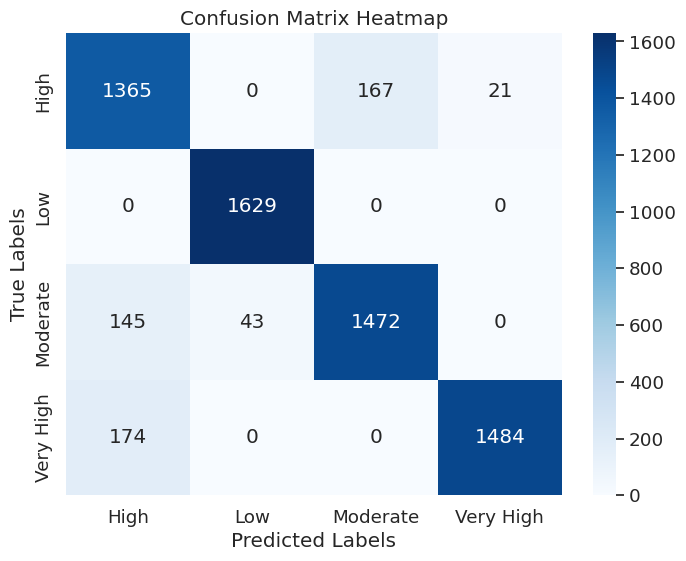

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)


# Create a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size if needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Low', 'Moderate', 'Very High'], yticklabels=['High', 'Low', 'Moderate', 'Very High'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

plt.show()


In [ ]:
# Find the indices of misclassified samples
misclassified_indices = np.where(y_true != y_pred)[0]


# Optionally, you can print or visualize the misclassified data
chigh = 0
vhr = 0
cvhigh = 0
hr = 0
cmod = 0
clow = 0
for i in range(len(X_test)):
    if y_true[i] != y_pred[i]:
      if y_true[i]=='Very High Risk':
        print(X_test.iloc[i])
        print()






## Observation


---



### y_true = 'Moderate' and y_pred = "Low'
* Teenagers with no medical conditions

### y_true = 'Moderate' and y_pred = 'High'
* 55+ with no medical conditions

### y_true = 'High' and y_pred = 'Moderate'
* 5 and below no medical conditions
* 19-35 pregnant women with no medical conditions

### y_true = 'High' and y_pred = 'Very High'
* 18 & below with Renal Disease
* 35+ pregnant women
* 35+ with Diabetes
* 74+ with Diabetes

### y_true = 'Very High' and y_pred = 'High'
* 73 & below with CVD
* 35+ pregnant women with no medical conditions
* 19-35 year old pregnant women with CVD
* 5 and below who are currently sick
* 13-18 with CVD

## Tree Structure

In [ ]:
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=X.columns.tolist())
print("Decision Tree Rules:")
print(tree_rules)


Decision Tree Rules:
|--- Age <= 35.50
|   |--- Age <= 5.50
|   |   |--- Renal Disease <= 0.50
|   |   |   |--- Minor Pathology <= 0.50
|   |   |   |   |--- Age <= 0.50
|   |   |   |   |   |--- Gender <= 0.50
|   |   |   |   |   |   |--- Cardiovascular Disease <= 0.50
|   |   |   |   |   |   |   |--- Unnamed: 0 <= 943.00
|   |   |   |   |   |   |   |   |--- class: Moderate Risk
|   |   |   |   |   |   |   |--- Unnamed: 0 >  943.00
|   |   |   |   |   |   |   |   |--- Unnamed: 0 <= 32105.50
|   |   |   |   |   |   |   |   |   |--- Unnamed: 0 <= 32007.00
|   |   |   |   |   |   |   |   |   |   |--- Unnamed: 0 <= 31716.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Moderate Risk
|   |   |   |   |   |   |   |   |   |   |--- Unnamed: 0 >  31716.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Moderate Risk
|   |   |   |   |   |   |   |   |   |--- Unnamed: 0 >  32007.00
|   |   |   |   |   |   |   |   |   |   |--- class: High Risk
|   |   |   |   |   |   |   |   |--- Un

In [ ]:
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
import graphviz

# Export the tree to a DOT file
dot_data = export_graphviz(clf, out_file=None, feature_names=X_train.columns.tolist(), filled=True, rounded=True)

# Render the DOT file using Graphviz's interactive tool (requires Graphviz installed)
graph = graphviz.Source(dot_data)
graph.view()


'Source.gv.pdf'

## Feature Importance

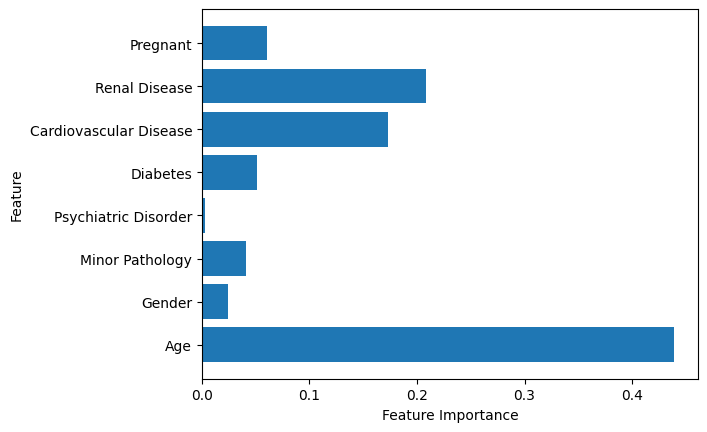

In [6]:
import matplotlib.pyplot as plt
feature_names=X_train.columns.tolist()

feature_importance = clf.feature_importances_
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Save Model

* For Deployment

In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 34.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
import joblib


joblib.dump(clf, 'model.pkl')


['model.pkl']

In [ ]:
import joblib

# Save the model to a file
joblib.dump(clf, 'riskpredictor.joblib')

['riskpredictor.joblib']